## Importing Libraries

In [1]:
# Importing req libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

## Data Acquisition

In [2]:
# Data Loading
!pip install datasets
from datasets import load_dataset

## Splitting and Saving data

In [3]:
# split train and test set
train_dataset = load_dataset('yelp_polarity', split = "train")
test_dataset = load_dataset('yelp_polarity', split = "test")

Reusing dataset yelp_polarity (/root/.cache/huggingface/datasets/yelp_polarity/plain_text/1.0.0/a770787b2526bdcbfc29ac2d9beb8e820fbc15a03afd3ebc4fb9d8529de57544)
Reusing dataset yelp_polarity (/root/.cache/huggingface/datasets/yelp_polarity/plain_text/1.0.0/a770787b2526bdcbfc29ac2d9beb8e820fbc15a03afd3ebc4fb9d8529de57544)


In [4]:
# displaying train and test set features
print("train_dataset:", display(train_dataset))
print("test_dataset:", display(test_dataset))

Dataset({
    features: ['text', 'label'],
    num_rows: 560000
})

train_dataset: None


Dataset({
    features: ['text', 'label'],
    num_rows: 38000
})

test_dataset: None


In [5]:
# dataset type
type(train_dataset)

datasets.arrow_dataset.Dataset

In [6]:
# converting to dataframe
train_df = pd.DataFrame(train_dataset)
test_df = pd.DataFrame(test_dataset)

In [7]:
# saving data to csv for further use
train_df.to_csv("train_dataset.csv")
test_df.to_csv("test_dataset.csv")

## Intial Data Analysis

In [8]:
# dataset shape
train_df.shape, test_df.shape

((560000, 2), (38000, 2))

In [9]:
# 0: Negative
# 1: Positive
train_df.head(10)

,text,label
0,"Unfortunately, the frustration of being Dr. Go...",0
1,Been going to Dr. Goldberg for over 10 years. ...,1
2,I don't know what Dr. Goldberg was like before...,0
3,I'm writing this review to give you a heads up...,0
4,All the food is great here. But the best thing...,1
5,Wing sauce is like water. Pretty much a lot of...,0
6,Owning a driving range inside the city limits ...,0
7,This place is absolute garbage... Half of the...,0
8,Before I finally made it over to this range I ...,1
9,I drove by yesterday to get a sneak peak. It ...,1


In [10]:
# Analysing Data
train_df.describe()

,label
count,560000.0
mean,0.5
std,0.5
min,0.0
25%,0.0
50%,0.5
75%,1.0
max,1.0


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560000 entries, 0 to 559999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    560000 non-null  object
 1   label   560000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.5+ MB


In [12]:
# Analysing Data
train_df.describe(include="all")

,text,label
count,560000,560000.0
unique,560000,NaN
top,This place is NOT nearly as good as the other ...,NaN
freq,1,NaN
mean,NaN,0.5
std,NaN,0.5
min,NaN,0.0
25%,NaN,0.0
50%,NaN,0.5
75%,NaN,1.0


In [13]:
train_df["label"].value_counts()

1    280000
0    280000
Name: label, dtype: int64

In [14]:
test_df["label"].value_counts()

1    19000
0    19000
Name: label, dtype: int64

In [15]:
# finding any null values in the dataset
train_df.isna().sum(), 
test_df.isna().sum()

text     0
label    0
dtype: int64

In [16]:
# word count for text
train_df["word_count"]=train_df["text"].apply(lambda x: len(x.split()))

In [17]:
# Displaying first ten rows of data
train_df.head(10)

,text,label,word_count
0,"Unfortunately, the frustration of being Dr. Go...",0,115
1,Been going to Dr. Goldberg for over 10 years. ...,1,97
2,I don't know what Dr. Goldberg was like before...,0,211
3,I'm writing this review to give you a heads up...,0,193
4,All the food is great here. But the best thing...,1,75
5,Wing sauce is like water. Pretty much a lot of...,0,60
6,Owning a driving range inside the city limits ...,0,217
7,This place is absolute garbage... Half of the...,0,108
8,Before I finally made it over to this range I ...,1,187
9,I drove by yesterday to get a sneak peak. It ...,1,73


In [18]:
# text with max word count
train_df["word_count"].max()

1052

In [19]:
# text with min count 
train_df["word_count"].min()

1

In [20]:
# avg word count
train_df["word_count"].median()

97.0

In [21]:
train_df["word_count"].describe()

count    560000.000000
mean        133.028873
std         122.611613
min           1.000000
25%          51.000000
50%          97.000000
75%         174.000000
max        1052.000000
Name: word_count, dtype: float64

## Unigram Analysis

In [22]:
#Unigram
def get_top_nwords (x, n):
  vec = CountVectorizer().fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis= 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]


In [23]:
words = get_top_nwords(train_df["text"], 10)
print(f"Top ten one word sequences: {words}")

Top ten one word sequences: [('the', 3694001), ('and', 2417801), ('to', 1892501), ('was', 1327978), ('it', 1139240), ('of', 1110586), ('for', 863936), ('in', 860850), ('is', 829485), ('that', 749656)]


In [24]:
words

[('the', 3694001),
 ('and', 2417801),
 ('to', 1892501),
 ('was', 1327978),
 ('it', 1139240),
 ('of', 1110586),
 ('for', 863936),
 ('in', 860850),
 ('is', 829485),
 ('that', 749656)]

## Bigram Analysis

In [25]:
#Bigram
def get_top_nwords (x, n):
  vec = CountVectorizer(ngram_range = (2,2)).fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis= 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]


In [26]:
words = get_top_nwords(train_df["text"], 10)
print(f"Top ten two word sequences: {words}")

Top ten two word sequences: [('of the', 249510), ('it was', 238522), ('in the', 210967), ('and the', 195511), ('on the', 162891), ('this place', 161186), ('to the', 149028), ('for the', 132114), ('the food', 112431), ('to be', 111505)]


In [27]:
words

[('of the', 249510),
 ('it was', 238522),
 ('in the', 210967),
 ('and the', 195511),
 ('on the', 162891),
 ('this place', 161186),
 ('to the', 149028),
 ('for the', 132114),
 ('the food', 112431),
 ('to be', 111505)]

## Trigram Analysis

In [28]:
#Trigram
def get_top_nwords (x, n):
  vec = CountVectorizer(ngram_range = (3,3)).fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis= 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]

In [29]:
words = get_top_nwords(train_df["text"], 10)
print(f"Top ten three word sequences: {words}")

Top ten three word sequences: [('one of the', 34494), ('this place is', 32493), ('and it was', 31370), ('the food was', 28021), ('the food is', 22305), ('the service was', 19128), ('if you re', 18218), ('if you are', 15720), ('some of the', 15117), ('this is the', 14511)]


In [30]:
words

[('one of the', 34494),
 ('this place is', 32493),
 ('and it was', 31370),
 ('the food was', 28021),
 ('the food is', 22305),
 ('the service was', 19128),
 ('if you re', 18218),
 ('if you are', 15720),
 ('some of the', 15117),
 ('this is the', 14511)]

## Unigram without stop words

In [31]:
#Unigram without stop words
def get_top_nwords (x, n):
  vec = CountVectorizer(ngram_range=(1,1), stop_words="english").fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis= 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]


In [32]:
words = get_top_nwords(train_df["text"], 10)
print(f"Top ten one word sequences without stop words: {words}")

Top ten one word sequences without stop words: [('food', 330046), ('place', 322806), ('good', 301079), ('like', 263020), ('just', 258813), ('time', 216601), ('great', 210527), ('service', 208710), ('really', 169415), ('don', 135844)]


In [33]:
words

[('food', 330046),
 ('place', 322806),
 ('good', 301079),
 ('like', 263020),
 ('just', 258813),
 ('time', 216601),
 ('great', 210527),
 ('service', 208710),
 ('really', 169415),
 ('don', 135844)]

Text(0.5, 0, 'Number of Occurences')

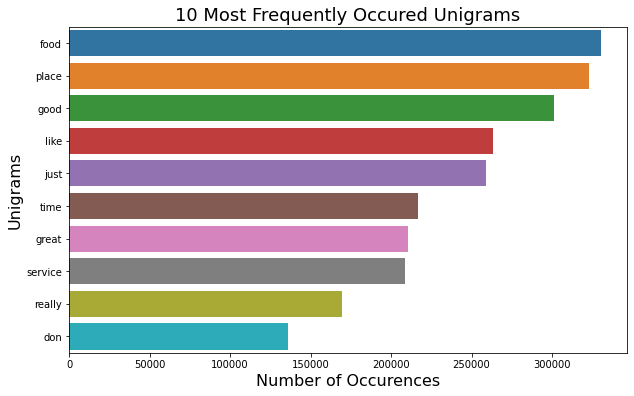

In [39]:
common_word = pd.DataFrame(words, columns=["words", "count"])
plt.figure(figsize=(10,6))
sns.barplot(y="words", x="count", data= common_word)
plt.title("10 Most Frequently Occured Unigrams", fontsize = 18)
plt.ylabel("Unigrams", fontsize = 16)
plt.xlabel("Number of Occurences", fontsize = 16)

## Bigram without stop words

In [40]:
#Bigram without stop words
def get_top_nwords (x, n):
  vec = CountVectorizer(ngram_range=(2,2), stop_words="english").fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis= 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]


In [41]:
words = get_top_nwords(train_df["text"], 10)
print(f"Top ten two word sequences without stop words: {words}")

Top ten two word sequences without stop words: [('customer service', 29776), ('las vegas', 20045), ('don know', 16589), ('really good', 16538), ('pretty good', 16236), ('happy hour', 15144), ('food good', 14819), ('ice cream', 12637), ('feel like', 11662), ('make sure', 11458)]


In [42]:
words

[('customer service', 29776),
 ('las vegas', 20045),
 ('don know', 16589),
 ('really good', 16538),
 ('pretty good', 16236),
 ('happy hour', 15144),
 ('food good', 14819),
 ('ice cream', 12637),
 ('feel like', 11662),
 ('make sure', 11458)]

Text(0.5, 0, 'Number of Occurences')

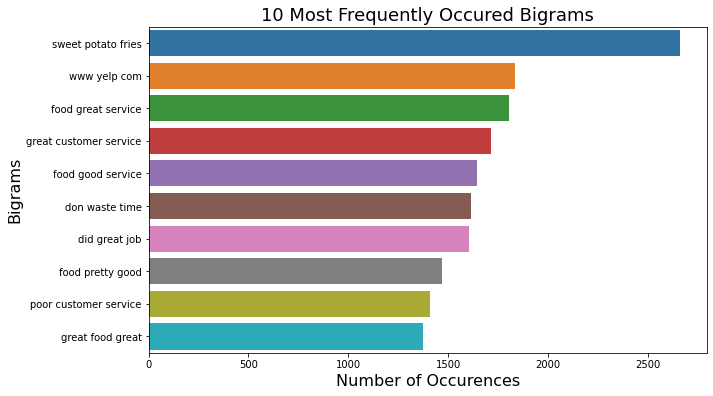

In [49]:
common_word = pd.DataFrame(words, columns=["words", "count"])
plt.figure(figsize=(10,6))
sns.barplot(y="words", x="count", data= common_word)
plt.title("10 Most Frequently Occured Bigrams", fontsize = 18)
plt.ylabel("Bigrams", fontsize = 16)
plt.xlabel("Number of Occurences", fontsize = 16)

## Trigram without stop words

In [44]:
#Trigram without stop words
def get_top_nwords (x, n):
  vec = CountVectorizer(ngram_range=(3,3), stop_words="english").fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis= 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]

In [45]:
words = get_top_nwords(train_df["text"], 10)
print(f"Top ten three word sequences without stopwords: {words}")

Top ten three word sequences without stopwords: [('sweet potato fries', 2660), ('www yelp com', 1836), ('food great service', 1803), ('great customer service', 1714), ('food good service', 1644), ('don waste time', 1612), ('did great job', 1604), ('food pretty good', 1470), ('poor customer service', 1409), ('great food great', 1376)]


In [46]:
words

[('sweet potato fries', 2660),
 ('www yelp com', 1836),
 ('food great service', 1803),
 ('great customer service', 1714),
 ('food good service', 1644),
 ('don waste time', 1612),
 ('did great job', 1604),
 ('food pretty good', 1470),
 ('poor customer service', 1409),
 ('great food great', 1376)]

Text(0.5, 0, 'Number of Occurences')

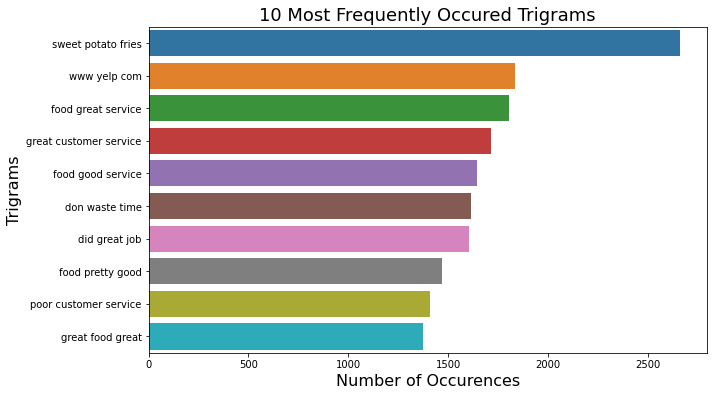

In [47]:
common_word = pd.DataFrame(words, columns=["words", "count"])
plt.figure(figsize=(10,6))
sns.barplot(y="words", x="count", data= common_word)
plt.title("10 Most Frequently Occured Trigrams", fontsize = 18)
plt.ylabel("Trigrams", fontsize = 16)
plt.xlabel("Number of Occurences", fontsize = 16)

In [48]:
print("End of the Note Book. \nThe next note book will be VADER Sentiment Analysis notebook.")

End of the Note Book. 
The next note book will be VADER Sentiment Analysis notebook.
